# Importing Libraries

In [47]:
import numpy as np 
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('dark_background')
print("Setup Complete")

/kaggle/input/playground-series-s3e18/sample_submission.csv
/kaggle/input/playground-series-s3e18/train.csv
/kaggle/input/playground-series-s3e18/test.csv
Setup Complete


# Importing Datasets

In [48]:
train_path = "../input/playground-series-s3e18/train.csv"
test_path = "../input/playground-series-s3e18/test.csv"

train_data = pd.read_csv(train_path,index_col="id")
test_data = pd.read_csv(test_path,index_col="id")

train_data.head()

,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,EState_VSA2,...,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2,EC1,EC2,EC3,EC4,EC5,EC6
id,,,,,,,,,,,,,,,,,,,,,
0,323.390782,9.879918,5.875576,5.875576,4.304757,4.304757,2.754513,1.749203,0.000000,11.938294,...,4.794537,35.527357,0,0,1,1,0,0,0,0
1,273.723798,7.259037,4.441467,5.834958,3.285046,4.485235,2.201375,1.289775,45.135471,0.000000,...,13.825658,44.707310,0,0,0,1,1,0,0,0
2,521.643822,10.911303,8.527859,11.050864,6.665291,9.519706,5.824822,1.770579,15.645394,6.606882,...,17.964475,45.660120,0,0,1,1,0,0,1,0
3,567.431166,12.453343,7.089119,12.833709,6.478023,10.978151,7.914542,3.067181,95.639554,0.000000,...,31.961948,87.509997,0,0,1,1,0,0,0,0
4,112.770735,4.414719,2.866236,2.866236,1.875634,1.875634,1.036450,0.727664,17.980451,12.841643,...,9.589074,33.333333,2,2,1,0,1,1,1,0


In [49]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14838 entries, 0 to 14837
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BertzCT            14838 non-null  float64
 1   Chi1               14838 non-null  float64
 2   Chi1n              14838 non-null  float64
 3   Chi1v              14838 non-null  float64
 4   Chi2n              14838 non-null  float64
 5   Chi2v              14838 non-null  float64
 6   Chi3v              14838 non-null  float64
 7   Chi4n              14838 non-null  float64
 8   EState_VSA1        14838 non-null  float64
 9   EState_VSA2        14838 non-null  float64
 10  ExactMolWt         14838 non-null  float64
 11  FpDensityMorgan1   14838 non-null  float64
 12  FpDensityMorgan2   14838 non-null  float64
 13  FpDensityMorgan3   14838 non-null  float64
 14  HallKierAlpha      14838 non-null  float64
 15  HeavyAtomMolWt     14838 non-null  float64
 16  Kappa3             148

# Exploratory Data Analysis

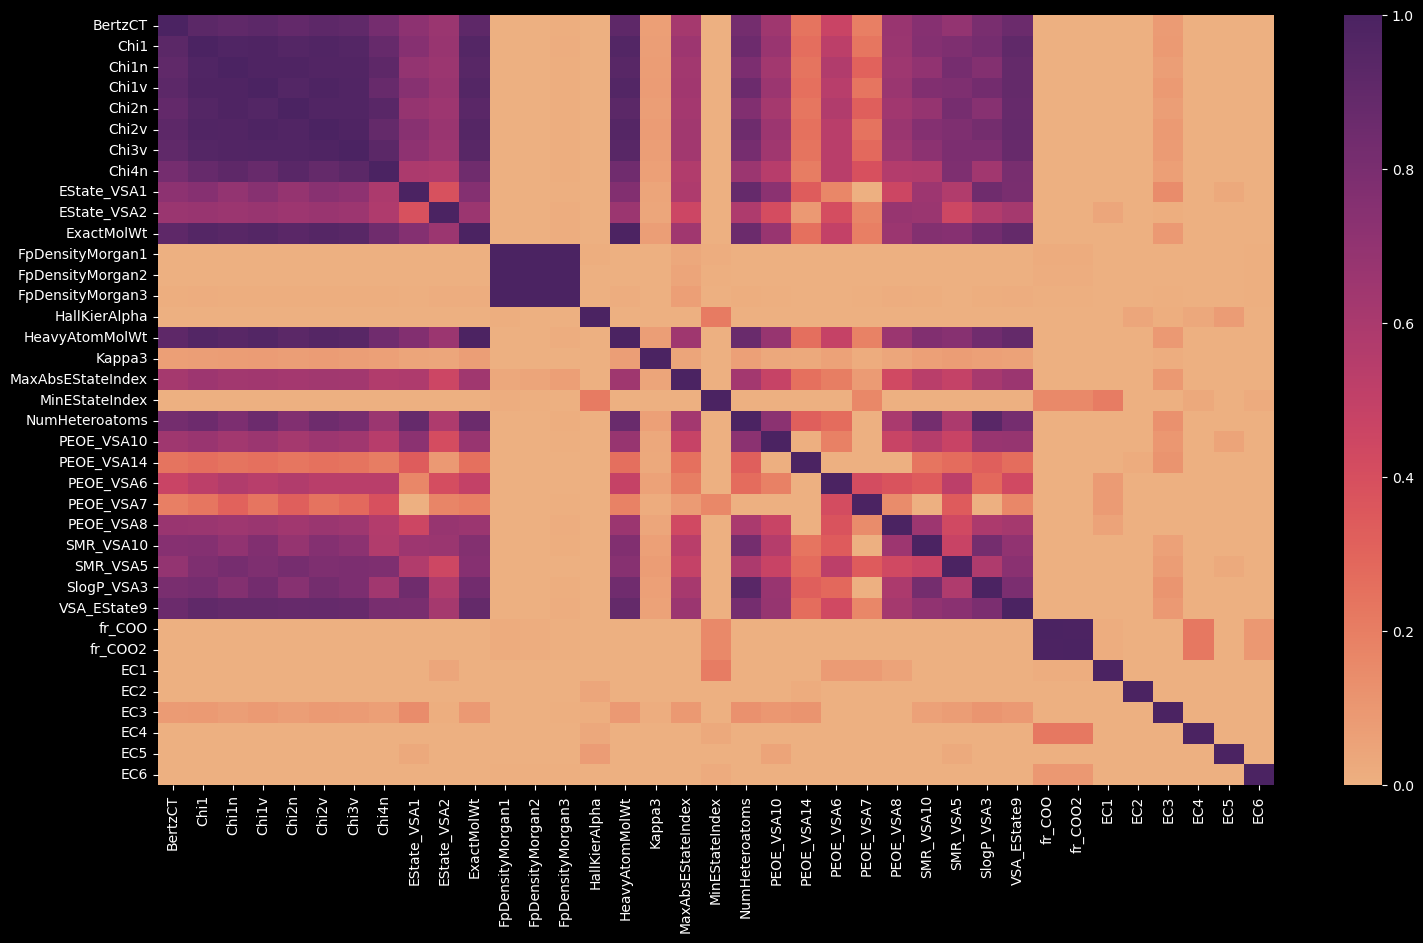

In [50]:
features = [i for i in train_data.columns]
corr = train_data[features].corr(numeric_only=False)
plt.figure(figsize = (18,10))
sns.heatmap(corr, cmap = 'flare', annot = False,vmin=0);
plt.show()

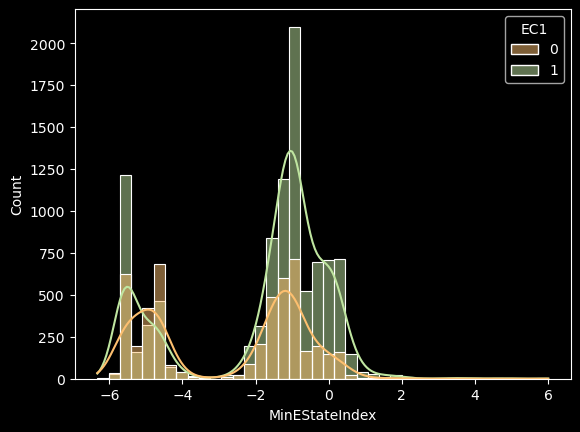

In [52]:
sns.histplot(train_data,x="MinEStateIndex",hue="EC1",bins=40,kde=True,palette="Spectral");

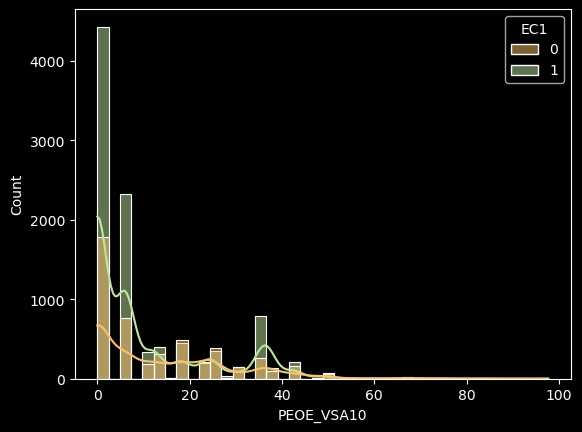

In [53]:
sns.histplot(train_data,x="PEOE_VSA10",hue="EC1",bins=40,kde=True,palette="Spectral");

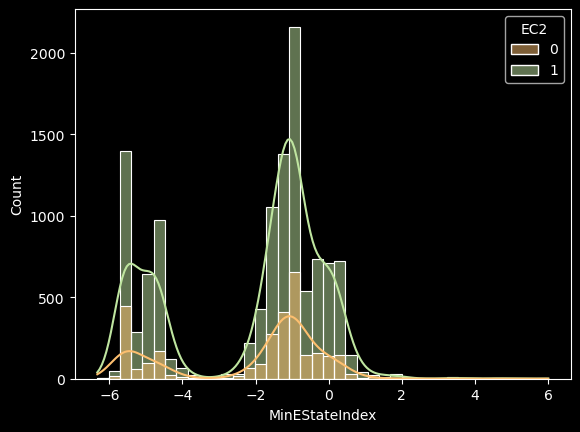

In [54]:
sns.histplot(train_data,x="MinEStateIndex",hue="EC2",bins=40,kde=True,palette="Spectral");

# Training Models

In [55]:
from catboost import CatBoostClassifier, Pool
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier

In [56]:
train_data.drop(["EC3","EC4","EC5","EC6"],inplace=True,axis=1)
cols = [i for i in train_data.columns if (i!="EC1" and i!="EC2")]
seed = np.random.seed(0)

X = train_data[cols]
y = train_data[["EC1","EC2"]]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20,random_state=seed)

y_train_ec1 = y_train["EC1"]
y_train_ec2 = y_train["EC2"]

y_test_ec1 = y_test["EC1"]
y_test_ec2 = y_test["EC2"]

In [57]:
rfmodel_ec1 = RandomForestClassifier(random_state=seed)
rfmodel_ec1.fit(X_train,y_train_ec1)

rfmodel_ec2 = RandomForestClassifier(random_state=seed)
rfmodel_ec2.fit(X_train,y_train_ec2)

print("-"*100)
print("ROC Area Under Curve of RF for EC1:",roc_auc_score(y_test_ec1, rfmodel_ec1.predict_proba(X_test)[:,1]))
print("ROC Area Under Curve of RF for EC2:",roc_auc_score(y_test_ec2, rfmodel_ec2.predict_proba(X_test)[:,1]))

----------------------------------------------------------------------------------------------------
ROC Area Under Curve of RF for EC1: 0.7022641176627431
ROC Area Under Curve of RF for EC2: 0.5536855804410636


In [58]:
gbmodel_ec1 = GradientBoostingClassifier(random_state=seed)
gbmodel_ec1.fit(X_train,y_train_ec1)

gbmodel_ec2 = GradientBoostingClassifier(random_state=seed)
gbmodel_ec2.fit(X_train,y_train_ec2)

print("-"*100)
print("ROC Area Under Curve of GB for EC1:",roc_auc_score(y_test_ec1, gbmodel_ec1.predict_proba(X_test)[:,1]))
print("ROC Area Under Curve of GB for EC2:",roc_auc_score(y_test_ec2, gbmodel_ec2.predict_proba(X_test)[:,1]))

----------------------------------------------------------------------------------------------------
ROC Area Under Curve of GB for EC1: 0.7096557265420058
ROC Area Under Curve of GB for EC2: 0.5802221143011489


In [59]:
hgbmodel_ec1 = HistGradientBoostingClassifier(random_state=seed)
hgbmodel_ec1.fit(X_train,y_train_ec1)

hgbmodel_ec2 = HistGradientBoostingClassifier(random_state=seed)
hgbmodel_ec2.fit(X_train,y_train_ec2)

print("-"*100)
print("ROC Area Under Curve of HGB for EC1:",roc_auc_score(y_test_ec1, hgbmodel_ec1.predict_proba(X_test)[:,1]))
print("ROC Area Under Curve of HGB for EC2:",roc_auc_score(y_test_ec2, hgbmodel_ec2.predict_proba(X_test)[:,1]))

----------------------------------------------------------------------------------------------------
ROC Area Under Curve of HGB for EC1: 0.697704706878906
ROC Area Under Curve of HGB for EC2: 0.5771073711608822


In [60]:
xgbmodel_ec1 = XGBClassifier(random_state=seed)
xgbmodel_ec1.fit(X_train,y_train_ec1)

xgbmodel_ec2 = XGBClassifier(random_state=seed)
xgbmodel_ec2.fit(X_train,y_train_ec2)

print("-"*100)
print("ROC Area Under Curve of XGB for EC1:",roc_auc_score(y_test_ec1, xgbmodel_ec1.predict_proba(X_test)[:,1]))
print("ROC Area Under Curve of XGB for EC2:",roc_auc_score(y_test_ec2, xgbmodel_ec2.predict_proba(X_test)[:,1]))

----------------------------------------------------------------------------------------------------
ROC Area Under Curve of XGB for EC1: 0.6777926647428127
ROC Area Under Curve of XGB for EC2: 0.5576314446842354


In [61]:
lgbmmodel_ec1 = LGBMClassifier(random_state=seed)
lgbmmodel_ec1.fit(X_train,y_train_ec1)

lgbmmodel_ec2 = LGBMClassifier(random_state=seed)
lgbmmodel_ec2.fit(X_train,y_train_ec2)

print("-"*100)
print("ROC Area Under Curve of LGBM for EC1:",roc_auc_score(y_test_ec1, lgbmmodel_ec1.predict_proba(X_test)[:,1]))
print("ROC Area Under Curve of LGBM for EC2:",roc_auc_score(y_test_ec2, lgbmmodel_ec2.predict_proba(X_test)[:,1]))

----------------------------------------------------------------------------------------------------
ROC Area Under Curve of LGBM for EC1: 0.7005779253142671
ROC Area Under Curve of LGBM for EC2: 0.5678848939902816


In [62]:
catmodel_ec1 = CatBoostClassifier(random_state=seed,verbose=False)
catmodel_ec1.fit(X_train,y_train_ec1)

catmodel_ec2 = CatBoostClassifier(random_state=seed,verbose=False)
catmodel_ec2.fit(X_train,y_train_ec2)

print("-"*100)
print("ROC Area Under Curve of CAT for EC1:",roc_auc_score(y_test_ec1, catmodel_ec1.predict_proba(X_test)[:,1]))
print("ROC Area Under Curve of CAT for EC2:",roc_auc_score(y_test_ec2, catmodel_ec2.predict_proba(X_test)[:,1]))

----------------------------------------------------------------------------------------------------
ROC Area Under Curve of CAT for EC1: 0.708154638477489
ROC Area Under Curve of CAT for EC2: 0.5701142902355376


In [63]:
vcmodel_ec1 = VotingClassifier([("cat",catmodel_ec1),("gb",gbmodel_ec1),("lgbm",lgbmmodel_ec1)],voting="soft")
vcmodel_ec1.fit(X_train,y_train_ec1)

vcmodel_ec2 = VotingClassifier([("cat",catmodel_ec2),("gb",gbmodel_ec2),("hgb",hgbmodel_ec2)],voting="soft")
vcmodel_ec2.fit(X_train,y_train_ec2)

print("-"*100)
print("ROC Area Under Curve of VC for EC1:",roc_auc_score(y_test_ec1, vcmodel_ec1.predict_proba(X_test)[:,1]))
print("ROC Area Under Curve of VC for EC2:",roc_auc_score(y_test_ec2, vcmodel_ec2.predict_proba(X_test)[:,1]))

----------------------------------------------------------------------------------------------------
ROC Area Under Curve of VC for EC1: 0.7100492654282626
ROC Area Under Curve of VC for EC2: 0.5827703854874046


# Creating 'submission.csv'

In [67]:
pred_ec1 = vcmodel_ec1.predict_proba(test_data)[:,1]
pred_ec2 = vcmodel_ec2.predict_proba(test_data)[:,1]

In [68]:
data = pd.read_csv(test_path)

colsToDrop = [i for i in data.columns if i !="id"]
submission = data.drop(colsToDrop,axis=1)
submission["EC1"] = pred_ec1
submission["EC2"] = pred_ec2

In [69]:
submission.head()

,id,EC1,EC2
0,14838,0.413549,0.801893
1,14839,0.817110,0.845465
2,14840,0.792090,0.716761
3,14841,0.727223,0.822984
4,14842,0.824661,0.804980


In [71]:
submission.to_csv("submission.csv",index=False,header=True)